In [2]:
import numpy as np
import networkx as nx
import scipy
from scipy import io

#download files

file = scipy.io.loadmat('capacities.mat') 
capacities = file.get('capacities') 
capacities = capacities.reshape(28,)
file = scipy.io.loadmat('traveltime.mat') 
traveltime = file.get('traveltime') 
traveltime = traveltime.reshape(28,)
file = scipy.io.loadmat('flow.mat') 
flow = file.get('flow')
flow = flow.reshape(28,)
file = scipy.io.loadmat('traffic.mat') 
traffic = file.get('traffic')

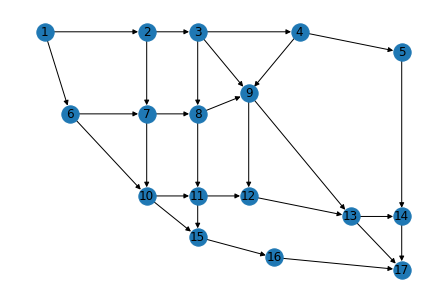

In [56]:
#create graph with traveltime as weight
G = nx.DiGraph()
G.add_weighted_edges_from([(1,2,traveltime[0]),(2,3,traveltime[1]),(3,4,traveltime[2]),(4,5,traveltime[3]),(1,6,traveltime[4]),(6,7,traveltime[5]),(7,8,traveltime[6]),(8,9,traveltime[7]),(9,13,traveltime[8]),(2,7,traveltime[9]),(3,8,traveltime[10]),(3,9,traveltime[11]),(4,9,traveltime[12]),(5,14,traveltime[13]),(6,10,traveltime[14]),(10,11,traveltime[15]),(10,15,traveltime[16]),(7,10,traveltime[17]),(8,11,traveltime[18]),(9,12,traveltime[19]),(11,12,traveltime[20]),(12,13,traveltime[21]),(13,14,traveltime[22]),(11,15,traveltime[23]),(13,17,traveltime[24]),(14,17,traveltime[25]),(15,16,traveltime[26]),(16,17,traveltime[27])])
pos={1: (0,5), 2: (1,5), 3: (1.5,5), 4: (2.5,5), 5: ( 3.5,4.75), 6:(0.25,4), 7: (1,4), 8:(1.5,4), 9:(2,4.25), 10: (1,3), 11: (1.5,3), 12:(2,3), 13: (3,2.75), 14:(3.5,2.75), 15:(1.5,2.5), 16: (2.25,2.25), 17:(3.5,2.10)}
nx.draw(G, pos=pos, with_labels=True)

In [57]:
#Point A
#shortest path from 1 to 17
nx.shortest_path(G, source = 1, target = 17, weight = 'weight')

[1, 2, 3, 9, 13, 17]

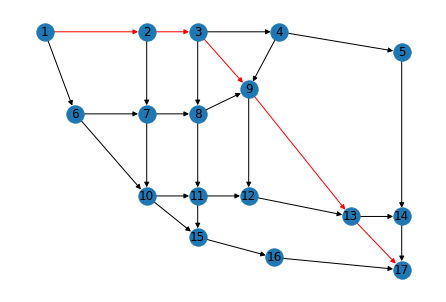

In [3]:
#resulting path 
Ga = nx.DiGraph() 
Ga.add_edges_from([(1,6,{'color': 'black'}),(1,2,{'color': 'red'}),(2,3,{'color': 'red'}),(2,7,{'color': 'black'}),(3,4,{'color': 'black'}),(3,9,{'color': 'red'}),(3,8,{'color': 'black'}),(4,5,{'color': 'black'}),(4,9,{'color': 'black'}),(5,14,{'color': 'black'}),(6,7,{'color': 'black'}),(6,10,{'color': 'black'}),(7,8,{'color': 'black'}),(7,10,{'color': 'black'}),(8,11,{'color': 'black'}),(8,9,{'color': 'black'}),(9,12,{'color': 'black'}),(9,13,{'color': 'red'}),(10,11,{'color': 'black'}),(10,15,{'color': 'black'}),(11,12,{'color': 'black'}),(11,15,{'color': 'black'}),(12,13,{'color': 'black'}),(13,14,{'color': 'black'}),(13,17,{'color': 'red'}),(14,17,{'color': 'black'}),(15,16,{'color': 'black'}),(16,17,{'color': 'black'})]) 
pos = {1: (0,5), 2: (1,5), 3: (1.5,5), 4: (2.3,5), 5: ( 3.5,4.75), 6:(0.3,4), 7: (1,4), 8:(1.5,4), 9:(2,4.3), 10: (1,3), 11: (1.5,3), 12:(2,3), 13: (3,2.75), 14:(3.5,2.75), 15:(1.5,2.5), 16: (2.25,2.25), 17:(3.5,2.10)} 

edges = Ga.edges()
colors = [Ga[u][v]['color'] for u,v in edges]

nx.draw(Ga, pos = pos, with_labels = True, edge_color = colors)

In [58]:
#Point B
G[1][2]['capacity'] = capacities[0]
G[2][3]['capacity'] = capacities[1]
G[3][4]['capacity'] = capacities[2]
G[4][5]['capacity'] = capacities[3]
G[1][6]['capacity'] = capacities[4]
G[6][7]['capacity'] = capacities[5]
G[7][8]['capacity'] = capacities[6]
G[8][9]['capacity'] = capacities[7]
G[9][13]['capacity'] = capacities[8]
G[2][7]['capacity'] = capacities[9]
G[3][8]['capacity'] = capacities[10]
G[3][9]['capacity'] = capacities[11]
G[4][9]['capacity'] = capacities[12]
G[5][14]['capacity'] = capacities[13]
G[6][10]['capacity'] = capacities[14]
G[10][11]['capacity'] = capacities[15]
G[10][15]['capacity'] = capacities[16]
G[7][10]['capacity'] = capacities[17]
G[8][11]['capacity'] = capacities[18]
G[9][12]['capacity'] = capacities[19]
G[11][12]['capacity'] = capacities[20]
G[12][13]['capacity'] = capacities[21]
G[13][14]['capacity'] = capacities[22]
G[11][15]['capacity'] = capacities[23]
G[13][17]['capacity'] = capacities[24]
G[14][17]['capacity'] = capacities[25]
G[15][16]['capacity'] = capacities[26]
G[16][17]['capacity'] = capacities[27]

#compute maximum flow
nx.algorithms.flow.maximum_flow(G, 1, 17)

(22448,
 {1: {2: 8741, 6: 13707},
  2: {3: 8741, 7: 0},
  3: {4: 0, 8: 0, 9: 8741},
  4: {5: 0, 9: 0},
  5: {14: 0},
  6: {7: 4624, 10: 9083},
  7: {8: 4624, 10: 0},
  8: {9: 4624, 11: 0},
  9: {13: 6297, 12: 7068},
  13: {14: 3835, 17: 10355},
  14: {17: 3835},
  10: {11: 825, 15: 8258},
  11: {12: 825, 15: 0},
  15: {16: 8258},
  12: {13: 7893},
  17: {},
  16: {17: 8258}})

In [59]:
#Point C
#Compute inflow as Bf = v
external_inflow = np.inner(traffic,flow)

In [60]:
#Point D
import cvxpy as cp

nu = [external_inflow[0], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -external_inflow[0]]
nu = np.array(nu, dtype=object)*1
B = traffic
n_edges = len(G.edges)
l = traveltime
c = capacities

f = cp.Variable(n_edges)
objective = cp.Minimize( cp.multiply(l,c) @ (cp.inv_pos(1-f/c)) - l@c)    
constraints = [B @ f == nu, f >= 0]
prob = cp.Problem(objective, constraints)
result = prob.solve()

flow_star = f.value
print("Social optimum:", f.value)

Social optimum: [6.64230051e+03 6.05889802e+03 3.13240161e+03 3.13240145e+03
 1.01636995e+04 4.63840047e+03 3.00636212e+03 2.54258815e+03
 3.13151936e+03 5.83402485e+02 1.26113499e-03 2.92649515e+03
 1.56756001e-04 3.13240145e+03 5.52529902e+03 2.85430437e+03
 4.88643549e+03 2.21544084e+03 4.63775232e+02 2.33756409e+03
 3.31807944e+03 5.65564353e+03 2.37304293e+03 1.63316053e-04
 6.41411997e+03 5.50544438e+03 4.88643565e+03 4.88643565e+03]


In [61]:
#Point E1
f = cp.Variable(n_edges)
objective = cp.Minimize( -cp.multiply(l,c)@cp.log(1-f/c) )    
constraints = [B @ f == nu, f >= 0]
prob = cp.Problem(objective, constraints)
result_w = prob.solve()

print("Wardrop equilibrium:", f.value)

Wardrop equilibrium: [6.71564829e+03 6.71564741e+03 2.36740739e+03 2.36740731e+03
 1.00903516e+04 4.64539488e+03 2.80384250e+03 2.28356153e+03
 3.41848000e+03 8.78819527e-04 1.76829148e+02 4.17141087e+03
 7.86356194e-05 2.36740731e+03 5.44495677e+03 2.35317159e+03
 4.93333843e+03 1.84155326e+03 6.97110115e+02 3.03649247e+03
 3.05028160e+03 6.08677407e+03 2.58651170e+03 1.08862334e-04
 6.91874238e+03 4.95391901e+03 4.93333854e+03 4.93333854e+03]


In [62]:
#Point E2
def delay_der(f, l, c):
    return (l/c)*(1/((1-f/c)**2))

omega = flow_star*delay_der(flow_star, l, c)

f = cp.Variable(n_edges)
objective = cp.Minimize( -cp.multiply(l,c)@cp.log(1-f/c) + f@omega)    
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)
result = prob.solve()

print("Wardrop equilibrium with tools:", f.value)

Wardrop equilibrium with tools: [6.64230468e+03 6.05906999e+03 3.13229874e+03 3.13229865e+03
 1.01636952e+04 4.63801369e+03 3.00624951e+03 2.54244517e+03
 3.13154097e+03 5.83234693e+02 3.45598818e-04 2.92677090e+03
 9.40191921e-05 3.13229865e+03 5.52568152e+03 2.85425150e+03
 4.88642889e+03 2.21499887e+03 4.63804687e+02 2.33767519e+03
 3.31805607e+03 5.65573126e+03 2.37316586e+03 1.20959777e-04
 6.41410637e+03 5.50546451e+03 4.88642901e+03 4.88642901e+03]


In [63]:
#Point F
f = cp.Variable(n_edges)
objective = cp.Minimize( cp.multiply(l,c) @ (cp.inv_pos(1-f/c)) - l@c - f@l)    
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)
result = prob.solve()

flow_star = f.value
print("System optimum", f.value)
###

omega_star = flow_star * delay_der(flow_star, l, c)

f = cp.Variable(n_edges)
objective = cp.Minimize( -cp.multiply(l,c)@cp.log(1-f/c) - f@l + f@omega_star)    
constraints = [B @ f == nu, f >= 0]
prob = cp.Problem(objective, constraints)
result = prob.solve()

flow_omega = f.value
print("Wardrop equilibrium with tools", f.value)

System optimum [6.65326049e+03 5.77465810e+03 3.41974720e+03 3.41974127e+03
 1.01527395e+04 4.64270104e+03 3.10584825e+03 2.66217967e+03
 3.00906114e+03 8.78602390e+02 7.47261013e-03 2.35490342e+03
 5.93671883e-03 3.41974127e+03 5.51003847e+03 3.04369304e+03
 4.88180062e+03 2.41545518e+03 4.43676052e+02 2.00802789e+03
 3.48736711e+03 5.49539501e+03 2.20377719e+03 1.97379951e-03
 6.30067895e+03 5.62351846e+03 4.88180259e+03 4.88180259e+03]
Wardrop equilibrium with tools [6.65336583e+03 5.77547001e+03 3.41941697e+03 3.41941652e+03
 1.01526341e+04 4.64273366e+03 3.10549447e+03 2.66172872e+03
 3.00921669e+03 8.77895820e+02 5.52440807e-04 2.35605249e+03
 4.51230733e-04 3.41941652e+03 5.50990042e+03 3.04332181e+03
 4.88171363e+03 2.41513502e+03 4.43766295e+02 2.00856498e+03
 3.48708791e+03 5.49565289e+03 2.20402862e+03 1.86527534e-04
 6.30084096e+03 5.62344514e+03 4.88171381e+03 4.88171381e+03]
